In [21]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from statistics import mean
from sklearn.linear_model import LogisticRegression

In [2]:
D= pd.read_csv('jena_climate_2009_2016.csv')
D.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [3]:
D.columns=['DateTime','p','T','Tpot','Tdew','rh','VPmax','VPact','VPdef','sh','H2OC','rho','wv','maxWV','wd']

In [4]:
D.corr(method ='pearson') 

,p,T,Tpot,Tdew,rh,VPmax,VPact,VPdef,sh,H2OC,rho,wv,maxWV,wd
p,1.000000,-0.045375,-0.124718,-0.066755,-0.018352,-0.031546,-0.054370,-0.003401,-0.069762,-0.069804,0.307640,-0.005701,-0.007760,-0.063258
T,-0.045375,1.000000,0.996827,0.895708,-0.572416,0.951113,0.867673,0.761744,0.866755,0.867177,-0.963410,-0.004689,-0.002871,0.038732
Tpot,-0.124718,0.996827,1.000000,0.894911,-0.567127,0.947293,0.866205,0.756962,0.866533,0.866955,-0.981345,-0.004195,-0.002224,0.043599
Tdew,-0.066755,0.895708,0.894911,1.000000,-0.156615,0.799271,0.968344,0.435752,0.967599,0.968044,-0.885232,-0.008718,-0.009091,0.049877
rh,-0.018352,-0.572416,-0.567127,-0.156615,1.000000,-0.615842,-0.151494,-0.843835,-0.150841,-0.150969,0.514282,-0.005020,-0.009921,-0.015912
VPmax,-0.031546,0.951113,0.947293,0.799271,-0.615842,1.000000,0.824865,0.875588,0.824460,0.824493,-0.901536,-0.004018,-0.002213,-0.009583
VPact,-0.054370,0.867673,0.866205,0.968344,-0.151494,0.824865,1.000000,0.449154,0.999851,0.999856,-0.850241,-0.009600,-0.010316,0.018418
VPdef,-0.003401,0.761744,0.756962,0.435752,-0.843835,0.875588,0.449154,1.000000,0.448641,0.448689,-0.698290,0.001852,0.005317,-0.030881
sh,-0.069762,0.866755,0.866533,0.967599,-0.150841,0.824460,0.999851,0.448641,1.000000,0.999997,-0.853325,-0.009479,-0.010163,0.019376
H2OC,-0.069804,0.867177,0.866955,0.968044,-0.150969,0.824493,0.999856,0.448689,0.999997,1.000000,-0.853769,-0.009477,-0.010158,0.019607


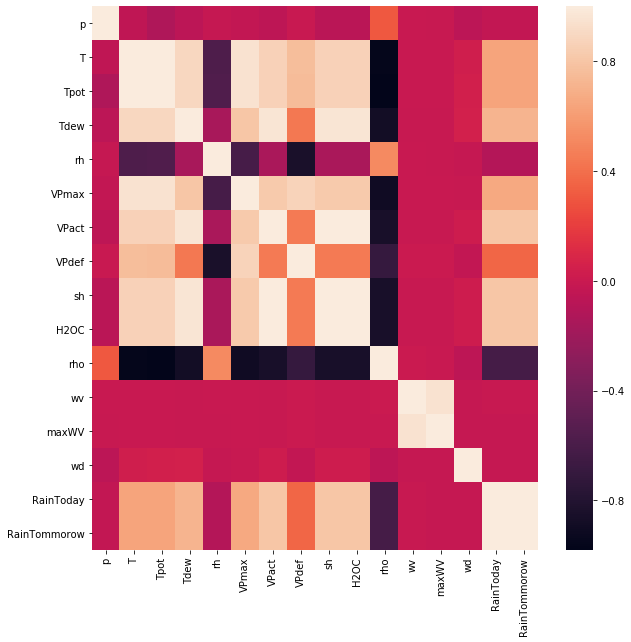

In [48]:
plt.figure(figsize=(10,10))
sns.heatmap(D.corr())

# Data Vis

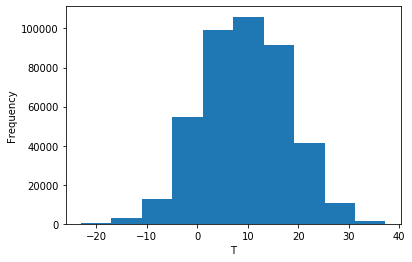

In [32]:
plt.xlabel("T")
D['T'].plot.hist();

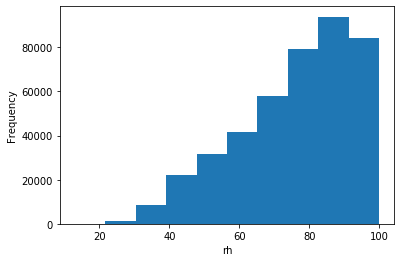

In [33]:
plt.xlabel("rh")
D['rh'].plot.hist();

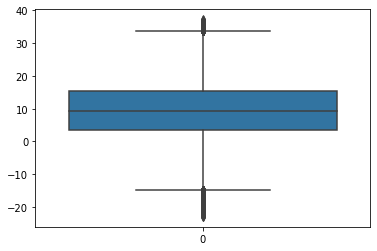

In [40]:
sns.boxplot(data=D['T']) ;

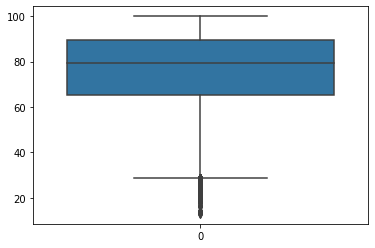

In [39]:
sns.boxplot(data=D['rh']) ;

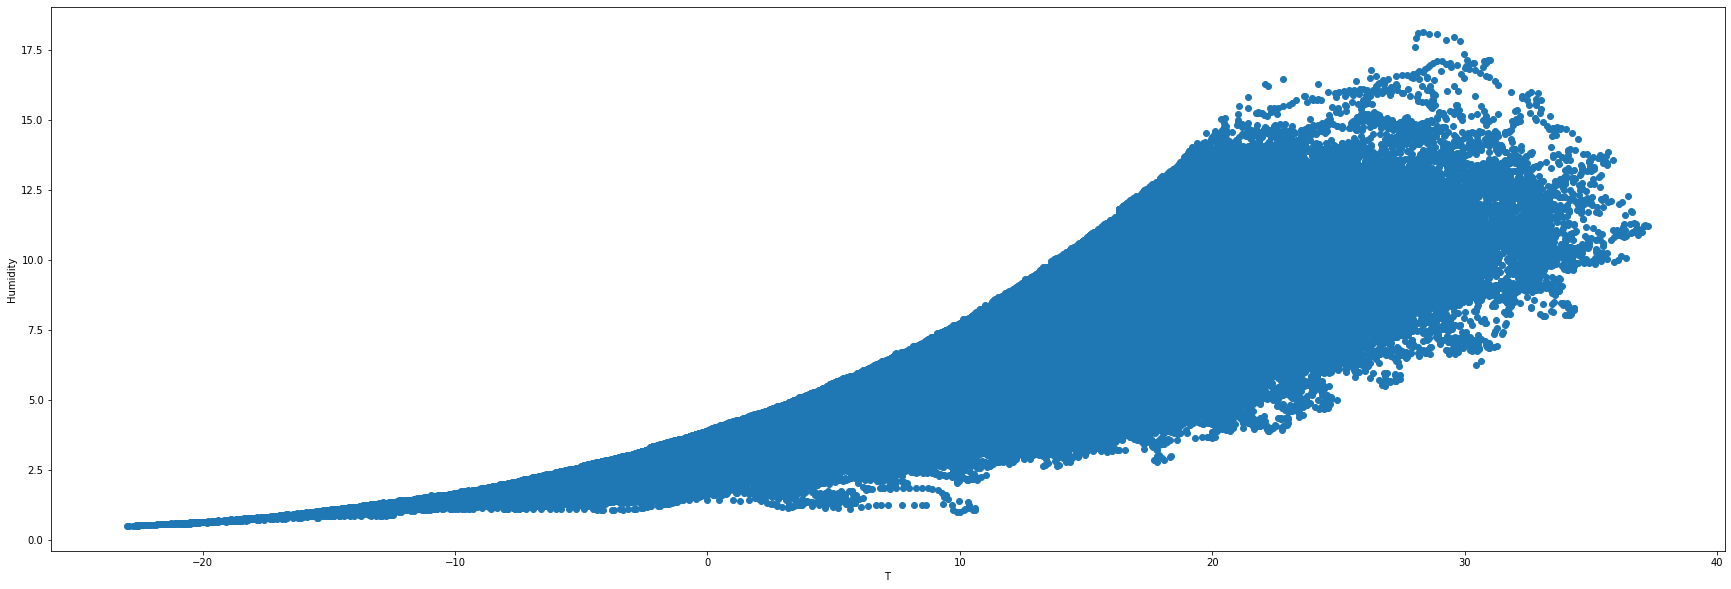

In [41]:
plt.figure(figsize=(30,10))
plt.xlabel("T")
plt.ylabel("Humidity")
x= D['T']
y = D['sh']
plt.scatter(x,y,marker='o')
        

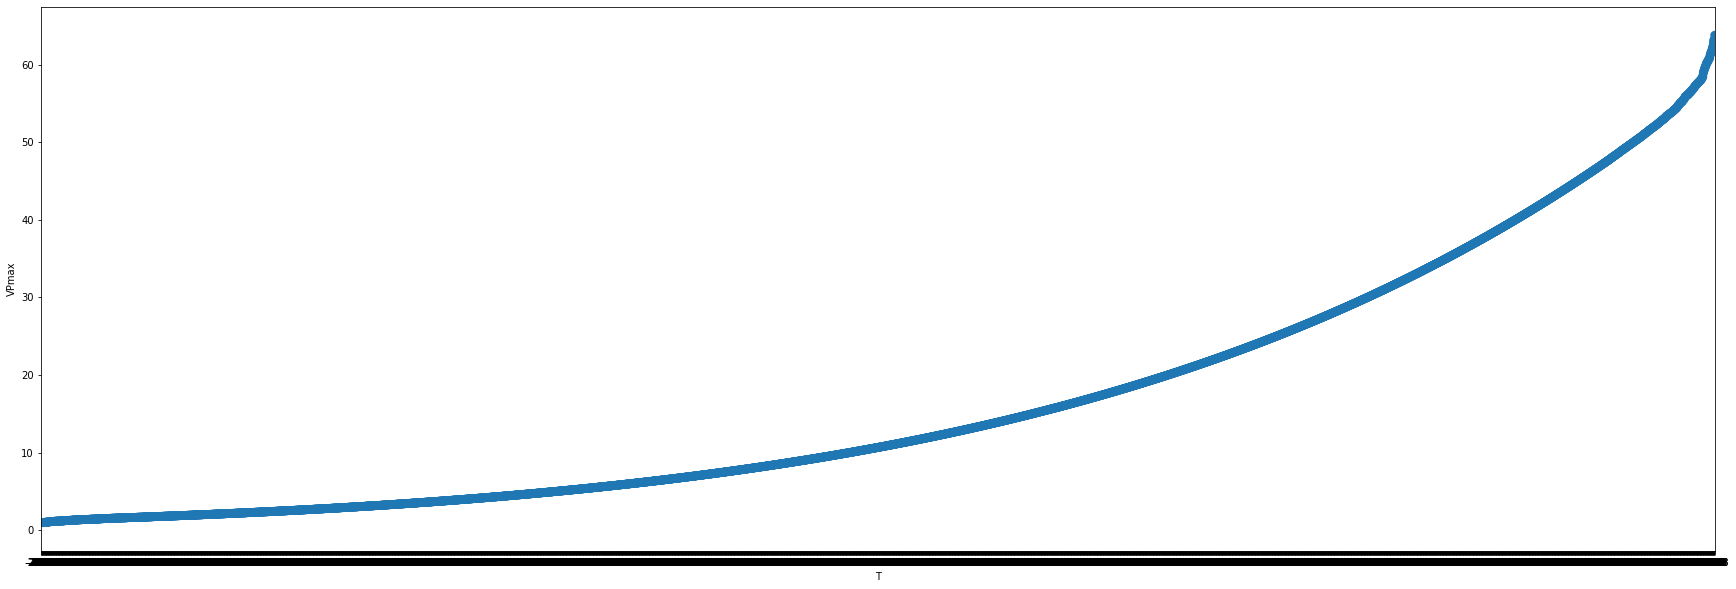

In [42]:
plt.figure(figsize=(30,10))
sns.pointplot(x=D.iloc[:,2],y=D.iloc[:,6],data=D)

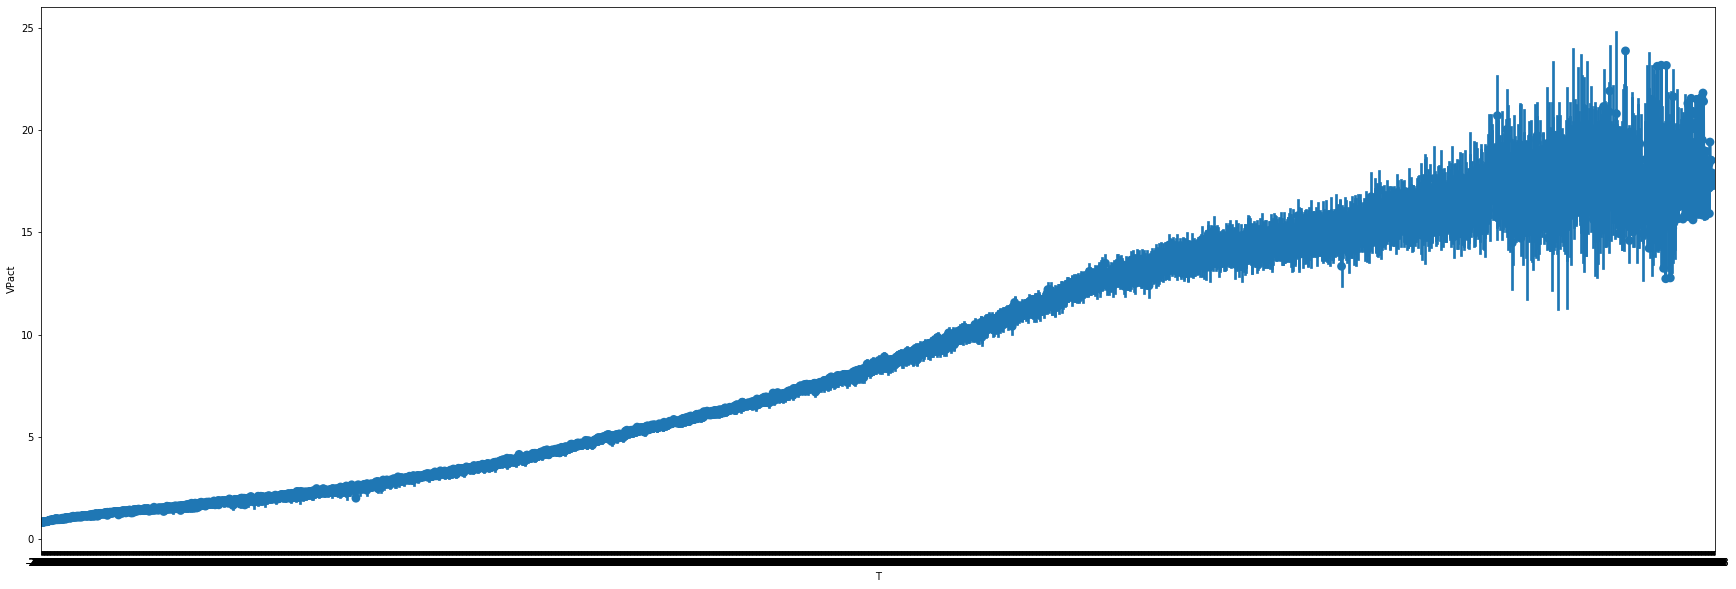

In [43]:
plt.figure(figsize=(30,10))
sns.pointplot(x=D.iloc[:,2],y=D.iloc[:,7],data=D)

# PolynomialRegression

In [28]:
y=D['T']
X=D[['sh','wv','wd','maxWV','VPact','p']]
XTrain,XTest,YTrain,YTest= train_test_split(X,y,test_size=0.20,random_state=30)
lr=LinearRegression()
poly= PolynomialFeatures(degree=2)
XTrain_=poly.fit_transform(XTrain)
lr.fit(XTrain_,YTrain)
XTest_=poly.fit_transform(XTest)
predicted = lr.predict(XTest_)
print(metrics.mean_squared_error(YTest,predicted))
print(metrics.r2_score(YTest,predicted))



11.758712244011665
0.8347400768281314


<Figure size 2160x720 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

In [30]:
count = 0
YTest = np.array(YTest)
for i in range(len(YTest)):
    if abs(YTest[i]-predicted[i]) < 3 :
        count = count + 1
print(count/len(YTest)*100)

68.30735575608422


In [50]:
T = np.arange(len(YTest))
YTest = np .array(YTest)


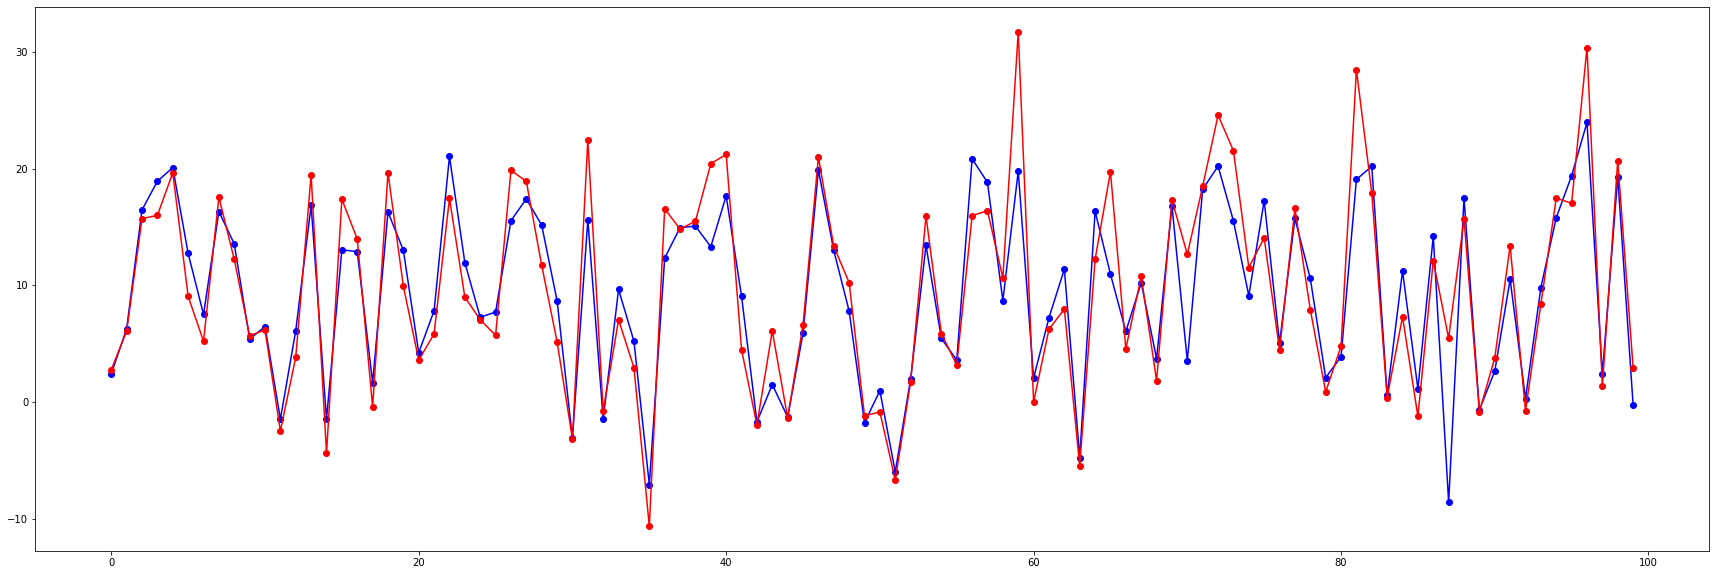

In [52]:
plt.figure(figsize=(30,10))
plt.plot(T[:100],predicted[:100],linestyle=None,marker='o',color='blue')
plt.plot(T[:100],YTest[:100],linestyle=None,marker='o',color='red')
plt.show()

In [ ]:
plt.figure(figsize=(30,10))
plt.plot(T[:100],predicted[:100],linestyle=None,marker='o',color='blue')
plt.show()

In [11]:
D1 = pd.read_csv('weatherAUs.csv')
D1

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,0.0,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,0.0,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,0.0,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,1.4,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,0.0,No


In [ ]:
D1.drop('RISK_MM',axis=1,inplace=True)
D1.drop('WindGustDir',axis=1,inplace=True)
D1.drop('WindGustSpeed',axis=1,inplace=True)
D1.drop('WindDir9am',axis=1,inplace=True)
D1.drop('WindDir3pm',axis=1,inplace=True)
D1.drop('WindSpeed3pm',axis=1,inplace=True)
D1.drop('WindSpeed9am',axis=1,inplace=True)

In [17]:
D1.isna().sum()
A = np.array(D1)
for i in range(len(A)):
    if A[i][8] != A[i][8] :
        A[i][8] = A[i][7]
        print(A)
for i in range(len(A)):
    if A[i][14] != A[i][14]:
        A[i][14] = A[i][13]
for i in range(len(A)):
    if A[i][15] !=A[i][15]:
        A[i][15]=A[i][16]
D1 = pd.DataFrame(A,columns=D1.columns.values)    
D1.Humidity9am.fillna(D1.Humidity9am.median(),inplace=True)
D1.Humidity3pm.fillna(D1.Humidity9am.median(),inplace=True)
D1.Temp9am.fillna(D1.Temp9am.median(),inplace=True)
D1.Temp3pm.fillna(D1.Temp3pm.median(),inplace=True)
#cleaning Nans 
D1.isna().sum()

Date                0
Location            0
MinTemp           637
MaxTemp           322
Rainfall         1406
Evaporation     60843
Sunshine        67816
Humidity9am         0
Humidity3pm         0
Pressure9am     13791
Pressure3pm     13981
Cloud9am        53657
Cloud3pm        57094
Temp9am             0
Temp3pm             0
RainToday           0
RainTomorrow        0
dtype: int64

In [18]:
le= LabelEncoder()
le.fit(D1['RainToday'])
D1['RainToday']=le.transform(D1['RainToday'])
D1['RainToday']
le.fit(D1['RainTomorrow'])
D1['RainTomorrow']=le.transform(D1['RainTomorrow'])
D1['RainTomorrow']

0         0
1         0
2         0
3         0
4         0
         ..
142188    0
142189    0
142190    0
142191    0
142192    0
Name: RainTomorrow, Length: 142193, dtype: int32

In [19]:
D1['H']=D1['Humidity3pm']+D1['Humidity9am']/2
D1['T']=D1['Temp3pm']+D1['Temp9am']/2
D1['H']


0         57.5
1         47.0
2         49.0
3         38.5
4         74.0
          ... 
142188    56.5
142189    49.5
142190    49.0
142191    50.5
142192    49.5
Name: H, Length: 142193, dtype: float64

In [23]:
y=D1['RainToday']
X=D1[['H','T']]
XTrain,XTest,YTrain,YTest= train_test_split(X,y,test_size=0.30,random_state=30)
lg = LogisticRegression ()
lg.fit(XTrain,YTrain)
YPred = lg.predict(XTest)
YTest =np.array(YTest)
count= 0
for i in range(len(YTest)):
    if YTest[i]==YPred[i]:
        count= count +1
print(count/len(YPred)*100)
XTest1 =D['VPact'] * 10
XTest1=pd.concat([XTest1,D['T']],axis=1)
YPred1 = lg.predict(XTest1)
D['RainToday']=YPred1

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


79.39190773125792


In [24]:
y=D1['RainTomorrow']
X=D1[['H','T','RainToday']]
XTrain,XTest,YTrain,YTest= train_test_split(X,y,test_size=0.30,random_state=30)
lg = LogisticRegression ()
lg.fit(XTrain,YTrain)
YPred = lg.predict(XTest)
YTest =np.array(YTest)
count= 0
for i in range(len(YTest)):
    if YTest[i]==YPred[i]:
        count= count +1
print(count/len(YPred)*100)
XTest2 = pd.concat([XTest1,D['RainToday']],axis=1)
YPred2 = lg.predict(XTest2)
D['RainTommorow']= YPred2

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


81.9775891978058


In [25]:
D

,DateTime,p,T,Tpot,Tdew,rh,VPmax,VPact,VPdef,sh,H2OC,rho,wv,maxWV,wd,RainToday,RainTommorow
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.30,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.30,0,0
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.40,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.10,0,0
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.90,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.60,0,0
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.20,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.00,0,0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.10,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.30,0,0
5,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.40,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.70,0,0
6,01.01.2009 01:10:00,996.50,-7.62,265.81,-8.30,94.80,3.44,3.26,0.18,2.04,3.27,1305.68,0.18,0.63,166.50,0,0
7,01.01.2009 01:20:00,996.50,-7.62,265.81,-8.36,94.40,3.44,3.25,0.19,2.03,3.26,1305.69,0.19,0.50,118.60,0,0
8,01.01.2009 01:30:00,996.50,-7.91,265.52,-8.73,93.80,3.36,3.15,0.21,1.97,3.16,1307.17,0.28,0.75,188.50,0,0
9,01.01.2009 01:40:00,996.53,-8.43,264.99,-9.34,93.10,3.23,3.00,0.22,1.88,3.02,1309.85,0.59,0.88,185.00,0,0
